# training the data filtered by DBscan


# Deleting Noises and runing the ML model


In [190]:
data = all_boxes[all_boxes[:,-2] == 1]
feature = np.array(features)
good_particles = features[np.isin(feature[:,0], data[:-2])]
print(good_particles)
print(len(good_particles))
print(len(features))

               id  In_halo  den_rc=0.8  den_rc=1.2  den_rc=1.6  den_rc=2  \
0        194017.0      0.0   -0.000684   -0.020199   -0.011283 -0.012361   
1        194067.0      0.0    0.002344   -0.016610   -0.007876 -0.009066   
2        194211.0      0.0    0.002344   -0.022891   -0.014311 -0.011973   
3        194262.0      0.0   -0.003712   -0.015713   -0.015447 -0.013330   
4        194310.0      0.0    0.014457   -0.013021   -0.010526 -0.009648   
...           ...      ...         ...         ...         ...       ...   
59995  19488712.0      0.0   -0.018854   -0.033658   -0.028695 -0.019338   
59996  19488792.0      0.0    0.005372   -0.022891   -0.013176 -0.018950   
59997  19488798.0      0.0   -0.027938   -0.016610   -0.012797 -0.013330   
59998  19488852.0      0.0   -0.024910   -0.029172   -0.028317 -0.018369   
59999  19488874.0      0.0   -0.079418   -0.039939   -0.033995 -0.023020   

       den_rc=2.4  den_rc=2.8  den_rc=3.2  den_rc=3.6  den_rc=4  den_rc=4.4  \
0       

In [194]:
#Now applying neural network on our good particles
#Making the matrices

X, y = good_particles.iloc[:,2:].values , good_particles['In_halo'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

from keras import utils
y_u_test = utils.to_categorical(y_test)
y_u_train = utils.to_categorical(y_train)

print(y_test)
print(y_u_test)
print(y_train)
print(y_u_train)

[[-0.22280225 -1.14897467 -0.87305077 ... -1.39949367 -1.46623017
  -0.13124614]
 [-0.12219863 -0.99278868 -0.69706224 ... -1.17951317 -1.30036837
  -0.4044187 ]
 [-0.12219863 -1.26611417 -1.02948501 ... -1.36123619 -1.39198727
  -0.11654065]
 ...
 [-1.12823484 -0.99278868 -0.95126789 ... -1.40140654 -1.51203962
  -0.93977067]
 [-1.02763122 -1.53943967 -1.75299339 ... -1.50087599 -1.4978229
  -0.68766708]
 [-2.83849639 -2.00799766 -2.0463076  ... -1.51809185 -1.47728763
  -1.14091091]]
[0. 0. 1. ... 0. 0. 0.]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[0. 1. 0. ... 0. 0. 1.]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [195]:
#Designing neural network
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import initializers

# Neural network
model = Sequential()
model.add(Dense(9, input_dim=12, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(7, activation='softmax'))
model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))

layer = layers.Dense(
    units=64,
    kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer='zeros'
)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=0.01)
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(loss='binary_crossentropy', optimizer = opt , metrics=['accuracy'])


In [196]:
history = model.fit(X_train, y_u_train,validation_data = (X_test,y_u_test), epochs=400, batch_size=1000)

Train on 46806 samples, validate on 11702 samples
Epoch 1/400
46806/46806 [==============================] - 1s 17us/step - loss: 0.6397 - accuracy: 0.6982 - val_loss: 0.5901 - val_accuracy: 0.7558
Epoch 2/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.5475 - accuracy: 0.7679 - val_loss: 0.5141 - val_accuracy: 0.7768
Epoch 3/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4992 - accuracy: 0.7803 - val_loss: 0.4842 - val_accuracy: 0.7871
Epoch 4/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4753 - accuracy: 0.7894 - val_loss: 0.4657 - val_accuracy: 0.7920
Epoch 5/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4609 - accuracy: 0.7942 - val_loss: 0.4562 - val_accuracy: 0.7961
Epoch 6/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4529 - accuracy: 0.7966 - val_loss: 0.4495 - val_accuracy: 0.7974
Epoch 7/400
46806/46806 [==============================] - 0s 5us/s

46806/46806 [==============================] - 0s 6us/step - loss: 0.4261 - accuracy: 0.7999 - val_loss: 0.4259 - val_accuracy: 0.8041
Epoch 57/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4260 - accuracy: 0.8000 - val_loss: 0.4256 - val_accuracy: 0.8036
Epoch 58/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4260 - accuracy: 0.7998 - val_loss: 0.4256 - val_accuracy: 0.8034
Epoch 59/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4259 - accuracy: 0.8003 - val_loss: 0.4260 - val_accuracy: 0.8049
Epoch 60/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4259 - accuracy: 0.8005 - val_loss: 0.4255 - val_accuracy: 0.8035
Epoch 61/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4260 - accuracy: 0.8004 - val_loss: 0.4255 - val_accuracy: 0.8035
Epoch 62/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4258 - accuracy: 0.8005 - val_loss: 0.4255 

46806/46806 [==============================] - 0s 5us/step - loss: 0.4248 - accuracy: 0.7998 - val_loss: 0.4246 - val_accuracy: 0.8029
Epoch 112/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4248 - accuracy: 0.8003 - val_loss: 0.4246 - val_accuracy: 0.8032
Epoch 113/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4247 - accuracy: 0.8002 - val_loss: 0.4246 - val_accuracy: 0.8032
Epoch 114/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4247 - accuracy: 0.8003 - val_loss: 0.4247 - val_accuracy: 0.8036
Epoch 115/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4248 - accuracy: 0.8001 - val_loss: 0.4246 - val_accuracy: 0.8035
Epoch 116/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4247 - accuracy: 0.8001 - val_loss: 0.4246 - val_accuracy: 0.8029
Epoch 117/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4247 - accuracy: 0.8005 - val_loss: 0

46806/46806 [==============================] - 0s 6us/step - loss: 0.4245 - accuracy: 0.8004 - val_loss: 0.4244 - val_accuracy: 0.8032
Epoch 167/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4245 - accuracy: 0.8004 - val_loss: 0.4244 - val_accuracy: 0.8033
Epoch 168/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8005 - val_loss: 0.4244 - val_accuracy: 0.8033
Epoch 169/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8004 - val_loss: 0.4244 - val_accuracy: 0.8032
Epoch 170/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8005 - val_loss: 0.4244 - val_accuracy: 0.8033
Epoch 171/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8003 - val_loss: 0.4244 - val_accuracy: 0.8032
Epoch 172/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8005 - val_loss: 0

46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8004 - val_loss: 0.4243 - val_accuracy: 0.8034
Epoch 222/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8006 - val_loss: 0.4243 - val_accuracy: 0.8035
Epoch 223/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4244 - accuracy: 0.8004 - val_loss: 0.4243 - val_accuracy: 0.8034
Epoch 224/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8004 - val_loss: 0.4243 - val_accuracy: 0.8034
Epoch 225/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8003 - val_loss: 0.4243 - val_accuracy: 0.8034
Epoch 226/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8033
Epoch 227/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4244 - accuracy: 0.8006 - val_loss: 0

46806/46806 [==============================] - 0s 6us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 277/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8032
Epoch 278/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8032
Epoch 279/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8032
Epoch 280/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8032
Epoch 281/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8032
Epoch 282/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0

46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 332/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 333/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 334/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 335/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 336/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 337/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0

46806/46806 [==============================] - 0s 6us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 387/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 388/400
46806/46806 [==============================] - 0s 7us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 389/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 390/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 391/400
46806/46806 [==============================] - 0s 5us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0.4243 - val_accuracy: 0.8031
Epoch 392/400
46806/46806 [==============================] - 0s 6us/step - loss: 0.4243 - accuracy: 0.8005 - val_loss: 0

In [197]:
y_pred = model.predict_classes(X_test)
#Converting predictions to label
print(y_pred)
print(y_test)

y_u_pred = model.predict(X_test)
print(y_u_pred)
pred = list()
for i in range(len(y_pred)):
     pred.append(np.argmax(y_u_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_u_test[i]))
    
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

[0 0 1 ... 0 0 0]
[0. 0. 1. ... 0. 0. 0.]
[[0.9445162  0.05548387]
 [0.96983814 0.03016183]
 [0.11038145 0.8896185 ]
 ...
 [0.9700566  0.02994346]
 [0.93795794 0.0620421 ]
 [0.9700566  0.02994346]]
Accuracy is: 80.31105793881387


[array([[-1.1530716,  0.3306176],
       [-0.9819671,  1.3078482],
       [ 0.9889726, -0.9914299]], dtype=float32), array([ 1.7390218, -1.7390219], dtype=float32)]


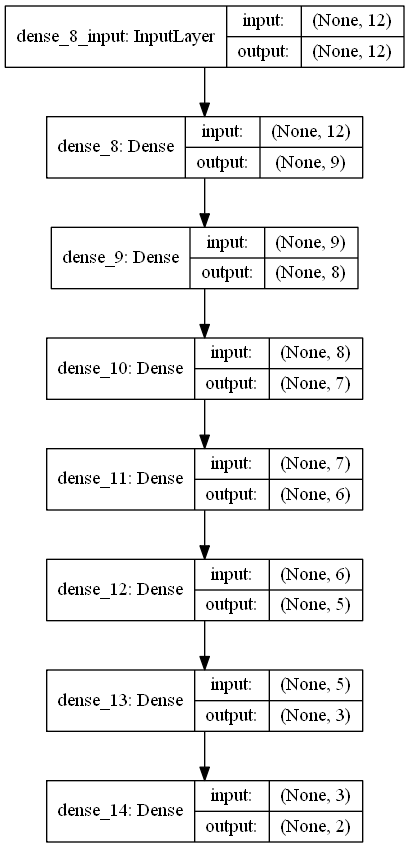

In [198]:
for layer in model.layers:
    weights = layer.get_weights()
print(weights)  
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True,)

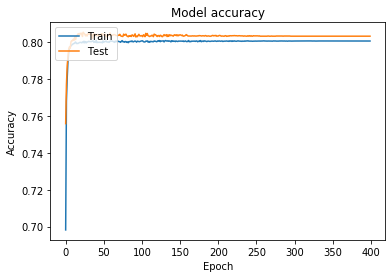

In [199]:
#print(history.history)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

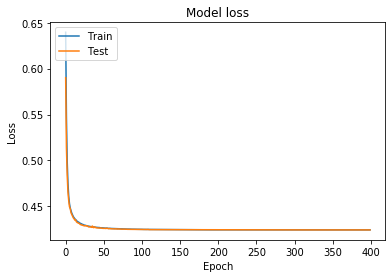

In [200]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


In [201]:
score = model.evaluate(X_test, y_u_test,verbose=1)

print(score)

y_pred = model.predict_classes(X_test)

print(y_pred)

11702/11702 [==============================] - 0s 20us/step
[0.4242868794119067, 0.8031105995178223]
[0 0 1 ... 0 0 0]


In [202]:
from sklearn.ensemble import RandomForestClassifier
import timeit
%alias_magic t timeit


classifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 4, 
                                    max_features = 'sqrt', max_depth = 10, bootstrap = True, random_state=0)

%t classifier.fit(X_train , y_train)

#Testing the classification on the test sample
Y_predict_rf = classifier.predict(X_test)

print(len(y_test))
print(len(Y_predict_rf[Y_predict_rf == 1]))

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.
1min 3s ± 1.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
11702
5751


In [203]:
from sklearn.metrics import classification_report
clf_report_rf = classification_report(y_test, Y_predict_rf)
print(clf_report_rf)

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      6092
         1.0       0.79      0.81      0.80      5610

    accuracy                           0.81     11702
   macro avg       0.81      0.81      0.81     11702
weighted avg       0.81      0.81      0.81     11702



In [204]:
a = accuracy_score(pred,test)
#b = accuracy_score(pred,train)
print('Accuracy is:', a*100)

Accuracy is: 80.31105793881387


In [209]:
print(clustering.core_sample_indices_)
cm_ids = box[i][clustering.core_sample_indices_, -2]
print(cm_ids)

[  608   609   610 ... 86536 86537 86551]
[2789219. 2789220. 2789221. ... 3041518. 3041519. 3041533.]


# Runing ML models only on CMs

In [217]:
peaks = features[np.isin(feature[:,0], cm_ids)]
print(len(peaks))
print(peaks)

25667
               id  In_halo  den_rc=0.8  den_rc=1.2  den_rc=1.6  den_rc=2  \
25       196585.0      0.0   -0.033995   -0.004049   -0.010904 -0.014881   
26       196613.0      0.0   -0.000684   -0.008535   -0.014690 -0.006547   
27       196699.0      0.0    0.002344   -0.002254   -0.007498 -0.006353   
28       196735.0      0.0    0.011429    0.004924   -0.005227 -0.005578   
29       196777.0      0.0   -0.012797    0.000437   -0.013933 -0.009648   
...           ...      ...         ...         ...         ...       ...   
59979  19485869.0      0.0    0.014457   -0.009432   -0.007119 -0.008485   
59980  19485989.0      0.0    0.008400   -0.009432   -0.003712 -0.005384   
59981  19486075.0      0.0   -0.009769   -0.017508   -0.002955 -0.001508   
59982  19486253.0      0.0   -0.055192   -0.021994   -0.015068 -0.008873   
59983  19486349.0      1.0   -0.046108   -0.030967   -0.018475 -0.011198   

       den_rc=2.4  den_rc=2.8  den_rc=3.2  den_rc=3.6  den_rc=4  den_rc=4.4  \
25

In [218]:
X1, y1 = peaks.iloc[:,2:].values , peaks['In_halo'].values

X1 = sc.fit_transform(X1)
print(X1)

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.2)

y_u_test1 = utils.to_categorical(y_test1)
y_u_train1 = utils.to_categorical(y_train1)

print(y_test1)
print(y_u_test1)
print(y_train1)
print(y_u_train1)

[[-1.50857837 -0.61602172 -1.06219531 ... -1.11460413 -1.18167668
  -0.19068121]
 [-0.34980956 -0.82557674 -1.27333907 ... -1.0425705  -1.00454084
  -0.26601625]
 [-0.24446694 -0.53219971 -0.87216594 ... -1.21064897 -1.20299859
  -0.0744356 ]
 ...
 [-0.66583742 -1.24468678 -0.61879343 ... -0.56434724 -0.81264369
  -0.03716033]
 [-2.2459767  -1.45424181 -1.29445344 ... -1.32070035 -1.38669501
  -0.99939799]
 [-1.92994884 -1.87335185 -1.48448282 ... -1.0425705  -1.08982847
   0.39484376]]
[0. 0. 0. ... 0. 1. 0.]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
[0. 1. 0. ... 0. 0. 0.]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [223]:
history = model.fit(X_train1, y_u_train1,validation_data = (X_test1,y_u_test1), epochs=1000, batch_size=1000)

Train on 20533 samples, validate on 5134 samples
Epoch 1/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7974 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 2/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7974 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 3/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7974 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 4/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7974 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 5/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7974 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 6/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7974 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 7/1000
20533/20533 [==============================] - 0s 

20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 111/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 112/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 113/1000
20533/20533 [==============================] - 0s 8us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 114/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 115/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8023
Epoch 116/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_l

Epoch 218/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 219/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 220/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 221/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 222/1000
20533/20533 [==============================] - 0s 5us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 223/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 224/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy:

Epoch 272/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 273/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 274/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 275/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 276/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 277/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 278/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy:

Epoch 381/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 382/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 383/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 384/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 385/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 386/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 387/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy:

20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 490/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 491/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 492/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 493/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 494/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 495/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_l

Epoch 544/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 545/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 546/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 547/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 548/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 549/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 550/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy:

Epoch 653/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 654/1000
20533/20533 [==============================] - 0s 7us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 655/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 656/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 657/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 658/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 659/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy:

Epoch 762/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 763/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 764/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 765/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 766/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 767/1000
20533/20533 [==============================] - 0s 5us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 768/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy:

Epoch 871/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 872/1000
20533/20533 [==============================] - 0s 5us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 873/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 874/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 875/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 876/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 877/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy:

20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 980/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 981/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 982/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 983/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 984/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_loss: 0.4278 - val_accuracy: 0.8021
Epoch 985/1000
20533/20533 [==============================] - 0s 6us/step - loss: 0.4322 - accuracy: 0.7975 - val_l

In [220]:
score = model.evaluate(X_test, y_u_test,verbose=1)

print(score)

y_pred = model.predict_classes(X_test)

print(y_pred)

11702/11702 [==============================] - 0s 20us/step
[0.42490938282424495, 0.8021705746650696]
[0 0 1 ... 0 0 0]


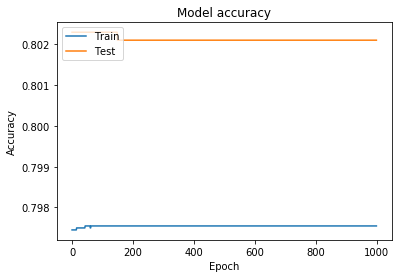

In [225]:
#print(history.history)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

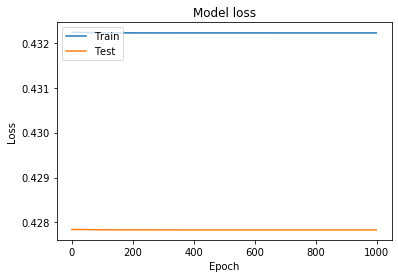

In [226]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


In [227]:
%t classifier.fit(X_train1 , y_train1)

#Testing the classification on the test sample
Y_predict_rf1 = classifier.predict(X_test1)

print(len(y_test1))
print(len(Y_predict_rf1[Y_predict_rf1 == 1]))

25.2 s ± 2.86 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
5134
2667


In [228]:

clf_report_rf1 = classification_report(y_test1, Y_predict_rf1)
print(clf_report_rf1)
a1 = accuracy_score(pred,test)
print('Accuracy is:', a1*100)

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80      2563
         1.0       0.79      0.82      0.80      2571

    accuracy                           0.80      5134
   macro avg       0.80      0.80      0.80      5134
weighted avg       0.80      0.80      0.80      5134

Accuracy is: 80.31105793881387
